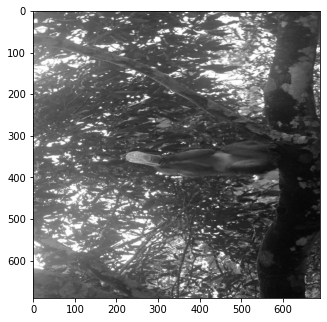

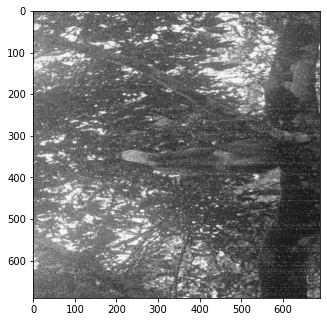

In [13]:
import numpy as np
import tensorflow as tf    
import cv2
import matplotlib.pyplot as plt                                                                                         
import os                                  

## funcion para mostrar una sola imagen
def show_one(x_test, pos):
    ## Funcion para verificar solo una Imagen
    fig, axs = plt.subplots(1, 1)  
    fig.tight_layout(pad=-1)                                                                                            
    plt.gray()  
    axs.imshow(tf.squeeze(x_test[pos,:,:]))  
    return None
    
def show_only_one(x_test):
    ## Funcion para verificar solo una Imagen
    fig, axs = plt.subplots(1, 1)  
    fig.tight_layout(pad=-1)                                                                                            
    plt.gray()  
    axs.imshow(tf.squeeze(x_test))  
    return None
    
## Funcion para leer las imgenes en una carpeta
def data(path_o):
    training_data = []
    index = os.listdir(path_o)
    index.sort()
    for img in index:
        for rotate in range(0, 4):
            if rotate == 0:
                pic_o = cv2.imread(os.path.join(path_o,img),0)
                pic_o = cv2.resize(pic_o,(690,690))
                training_data.append([pic_o])
            else:
                pic_o = cv2.imread(os.path.join(path_o,img),0)
                pic_o = cv2.resize(pic_o,(690,690))
                pic_o = cv2.rotate(pic_o, rotate-1)
                training_data.append([pic_o])
            
    training = np.array(training_data).reshape(len(training_data),pic_o.shape[0],pic_o.shape[1])
    return training

## Funcion para mostrar las imagenes que se adquirio
def show_figure(x_test):  
    ## Generar una figura vacia
    fig, axs = plt.subplots(1, x_test.shape[0])                                                                                                                                                                              
    plt.gray()                                                                                                          
    a=0                                                                                                                 
                                                                                                 
    for j in range(x_test.shape[0]):    
        ## Graficar en cada posicon del subplot
        axs[j].imshow(tf.squeeze(x_test[a]))                                                                                                                                              
        a = a+1 
    return None

def automatic_write(images, path):
    k = 1
    for image in images:
        name = str(k)+".jpg"
        cv2.imwrite(os.path.join(path , name), image)
        k =k+1
    return None

## Especificacion del path de las originales
path_o = '/home/fer/MATLAB_1/DenoisingNetwork/originals/'

## Especificacion del path de las que tienen ruido
path_n =  '/home/fer/MATLAB_1/DenoisingNetwork/noisys/'

## Lectura de las imagenes en la direccion correspondiente
original_images = data(path_o)
noisy_images = data(path_n)

## Monstrar las imagenes dependiendo de las posicion deseada
show_one(original_images,15)
show_one(noisy_images,15)

## Especificacion de donde se van a guaradar las imagenes originales rotadas
path_o_w = '/home/fer/MATLAB_1/DenoisingNetwork/train/original'
## Especificacion de donde se van a guaradar las imagenes con ruido rotadas
path_n_w = '/home/fer/MATLAB_1/DenoisingNetwork/train/noisy'

## generar imagenes y guardarlas automaticamente en una direccion especifica
automatic_write(original_images, path_o_w)
automatic_write(noisy_images, path_n_w)